In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7,6,2,5,Facebook,10
1,U002,30,Other,5.1,7,8,5,3,LinkedIn,10
2,U003,23,Other,7.4,6,7,1,3,YouTube,6
3,U004,36,Female,5.7,7,8,1,1,TikTok,8
4,U005,34,Female,7.0,4,7,5,1,X (Twitter),8


In [3]:
df.shape

(500, 10)

In [4]:
# Data quality check
def data_overview(df):
    print("=== DATA OVERVIEW ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f}MB")

    print("\n=== DATA TYPES ===")
    print(df.dtypes)

    print("\n=== MISSING VALUES ===")
    missing = df.isnull().sum()
    print(missing[missing > 0])

    print("\n=== BASIC STATISTICS ===")
    print(df.describe())

data_overview(df)

=== DATA OVERVIEW ===
Dataset shape: (500, 10)
Memory usage: 0.11MB

=== DATA TYPES ===
User_ID                       object
Age                            int64
Gender                        object
Daily_Screen_Time(hrs)       float64
Sleep_Quality(1-10)            int64
Stress_Level(1-10)             int64
Days_Without_Social_Media      int64
Exercise_Frequency(week)       int64
Social_Media_Platform         object
Happiness_Index(1-10)          int64
dtype: object

=== MISSING VALUES ===
Series([], dtype: int64)

=== BASIC STATISTICS ===
              Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
count  500.000000              500.000000           500.000000   
mean    32.988000                5.530000             6.304000   
std      9.960637                1.734877             1.529792   
min     16.000000                1.000000             2.000000   
25%     24.000000                4.300000             5.000000   
50%     34.000000                5.600000             6.0

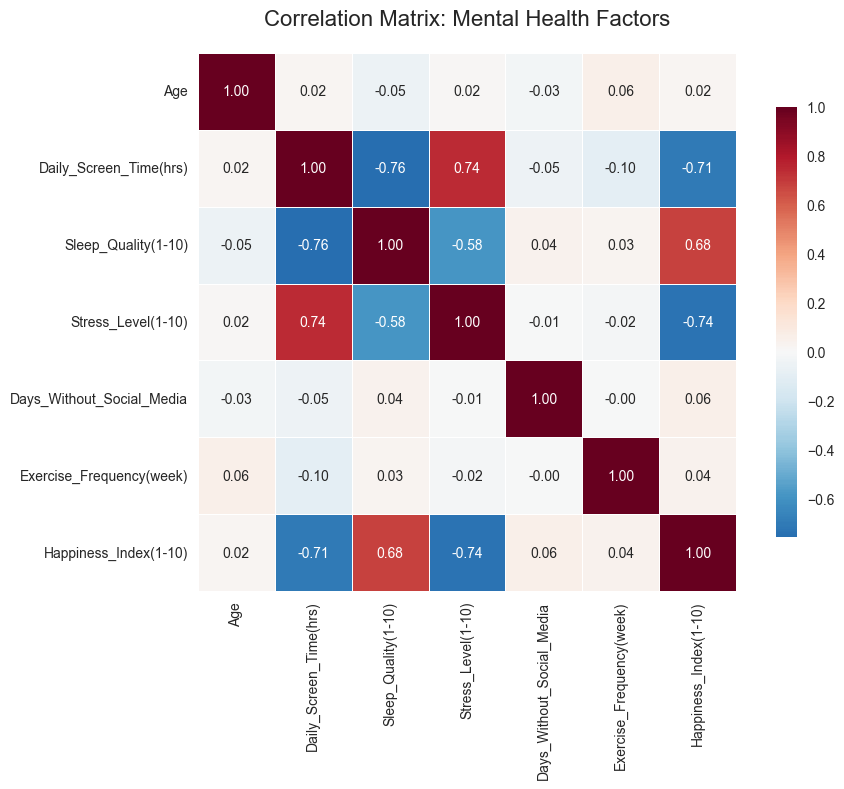

CORRELATIONS WITH HAPPINESS INDEX:
Happiness_Index(1-10)     : +1.000
Sleep_Quality(1-10)       : +0.679
Days_Without_Social_Media : +0.064
Exercise_Frequency(week)  : +0.041
Age                       : +0.019
Daily_Screen_Time(hrs)    : -0.705
Stress_Level(1-10)        : -0.737


In [5]:
# Clean correlation heatmap
plt.figure(figsize=(10, 8))

# Select only the numerical columns
numeric_columns = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 
                  'Stress_Level(1-10)', 'Days_Without_Social_Media', 
                  'Exercise_Frequency(week)', 'Happiness_Index(1-10)']

# Calculate correlations
corr_matrix = df[numeric_columns].corr()

# Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            cmap='RdBu_r',       # Red-Blue color scheme
            center=0,            # Center at 0
            square=True,         # Square cells
            fmt='.2f',           # 2 decimal places
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Correlation Matrix: Mental Health Factors', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Also print the correlations with happiness for clarity
print("CORRELATIONS WITH HAPPINESS INDEX:")
print("=" * 40)
happiness_correlations = corr_matrix['Happiness_Index(1-10)'].sort_values(ascending=False)
for factor, corr in happiness_correlations.items():
    print(f"{factor:25} : {corr:+.3f}")

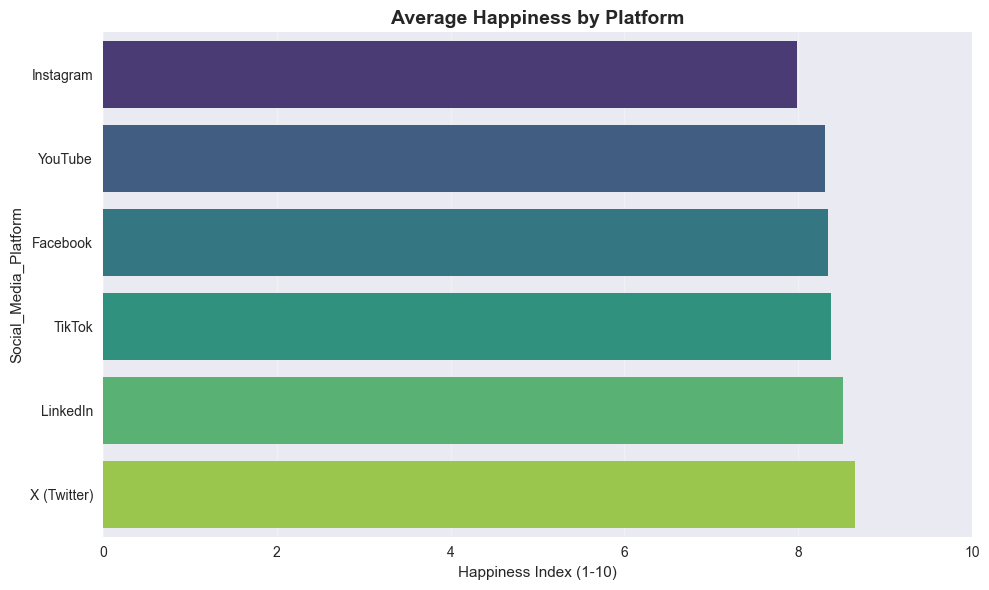

Platform Happiness Rankings:
1. Instagram:  7.99
1. YouTube:  8.31
1. Facebook:  8.35
1. TikTok:  8.38
1. LinkedIn:  8.52
1. X (Twitter):  8.65


In [6]:
#Plot 1: Happiness by Platform
plt.figure(figsize=(10, 6))
platform_happiness = df.groupby('Social_Media_Platform')['Happiness_Index(1-10)'].mean().sort_values()
sns.barplot(x=platform_happiness.values, y=platform_happiness.index, palette='viridis')
plt.title('Average Happiness by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Happiness Index (1-10)')
plt.xlim(0, 10)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Platform Happiness Rankings:")
for i, (platform, score) in enumerate(platform_happiness.items(), 1):
    print(f"{1}. {platform}: {score: .2f}")

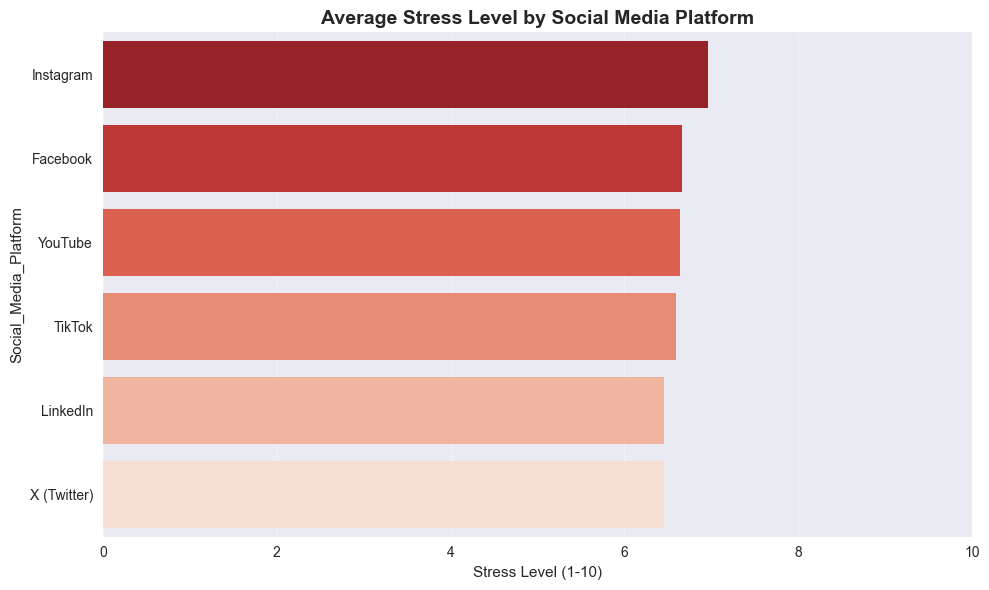

In [7]:
# 2. Platform Stress Comparison 
plt.figure(figsize=(10, 6))
platform_stress = df.groupby('Social_Media_Platform')['Stress_Level(1-10)'].mean().sort_values(ascending=False)
sns.barplot(x=platform_stress.values, y=platform_stress.index, palette='Reds_r')
plt.title('Average Stress Level by Social Media Platform', fontsize=14, fontweight='bold')
plt.xlabel('Stress Level (1-10)')
plt.xlim(0, 10)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

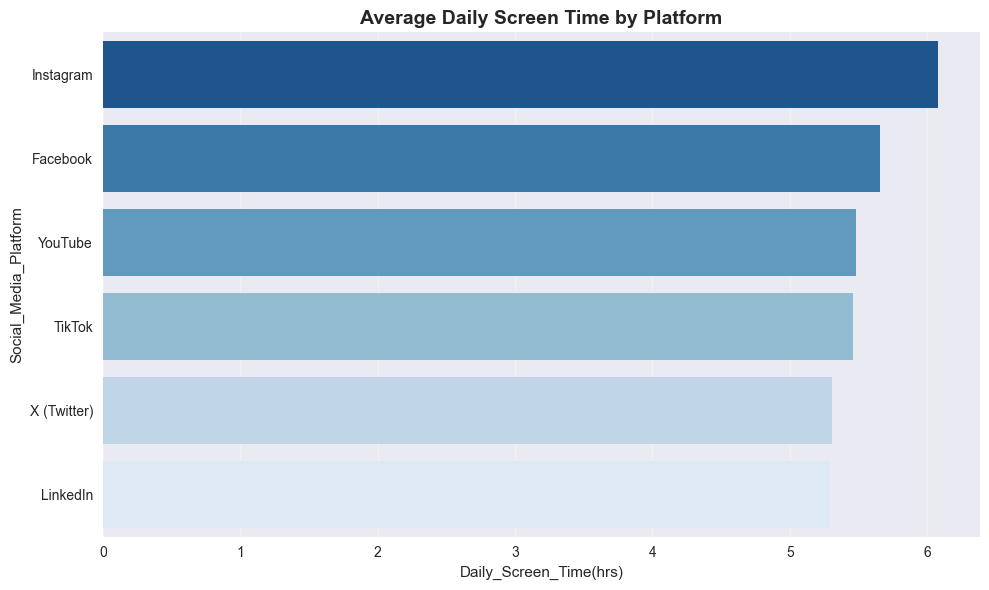

In [8]:
# 3. Platform Screen Time 
plt.figure(figsize=(10, 6))
platform_screen = df.groupby('Social_Media_Platform')['Daily_Screen_Time(hrs)'].mean().sort_values(ascending=False)
sns.barplot(x=platform_screen.values, y=platform_screen.index, palette='Blues_r')
plt.title('Average Daily Screen Time by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Daily_Screen_Time(hrs)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

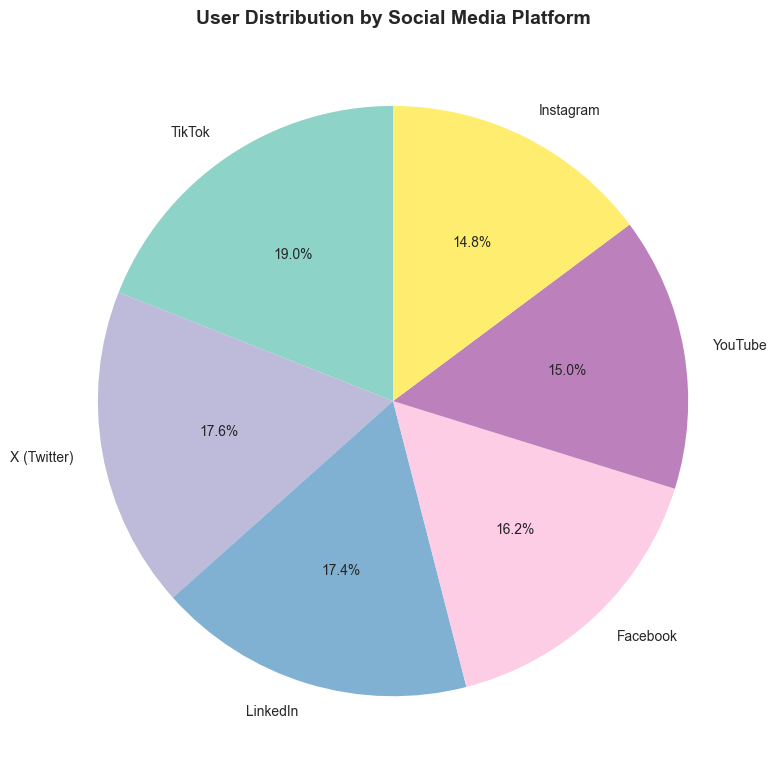

In [9]:
# 4. User Distribution Pie Chart
plt.figure(figsize=(8, 8))
platform_counts = df['Social_Media_Platform'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(platform_counts)))
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('User Distribution by Social Media Platform', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

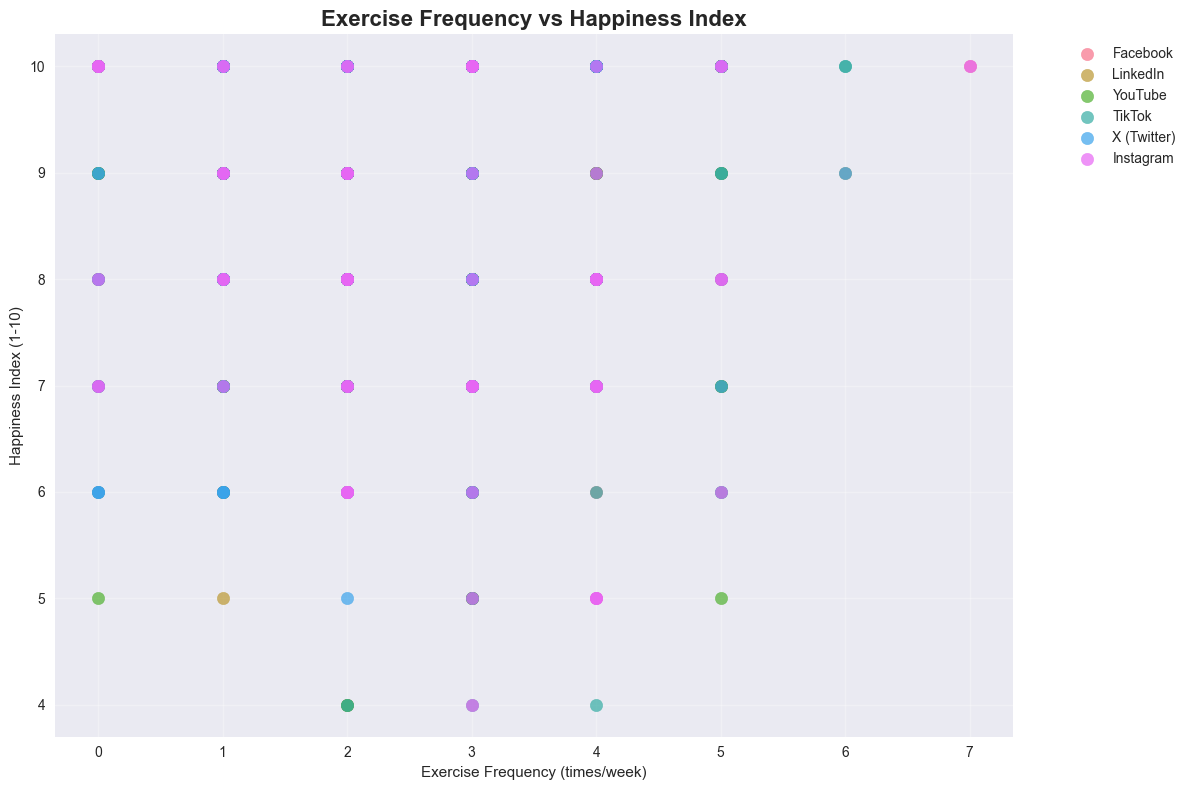

Correlation between exercise and happiness: 0.041 (very weak)
No clear relationship - exercise frequency alone doesn't strongly predict happiness


In [10]:
# 5. Exercise Frequency vs Happiness Index by Platform
plt.figure(figsize=(12, 8))

# Create the scatter plot with platforms
for platform in df['Social_Media_Platform'].unique():
    platform_data = df[df['Social_Media_Platform'] == platform]
    plt.scatter(platform_data['Exercise_Frequency(week)'], 
               platform_data['Happiness_Index(1-10)'],
               label=platform, alpha=0.7, s=80)

plt.title('Exercise Frequency vs Happiness Index', fontsize=16, fontweight='bold')
plt.xlabel('Exercise Frequency (times/week)')
plt.ylabel('Happiness Index (1-10)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Just mention the weak correlation in text
correlation = df['Exercise_Frequency(week)'].corr(df['Happiness_Index(1-10)'])
print(f"Correlation between exercise and happiness: {correlation:.3f} (very weak)")
print("No clear relationship - exercise frequency alone doesn't strongly predict happiness")

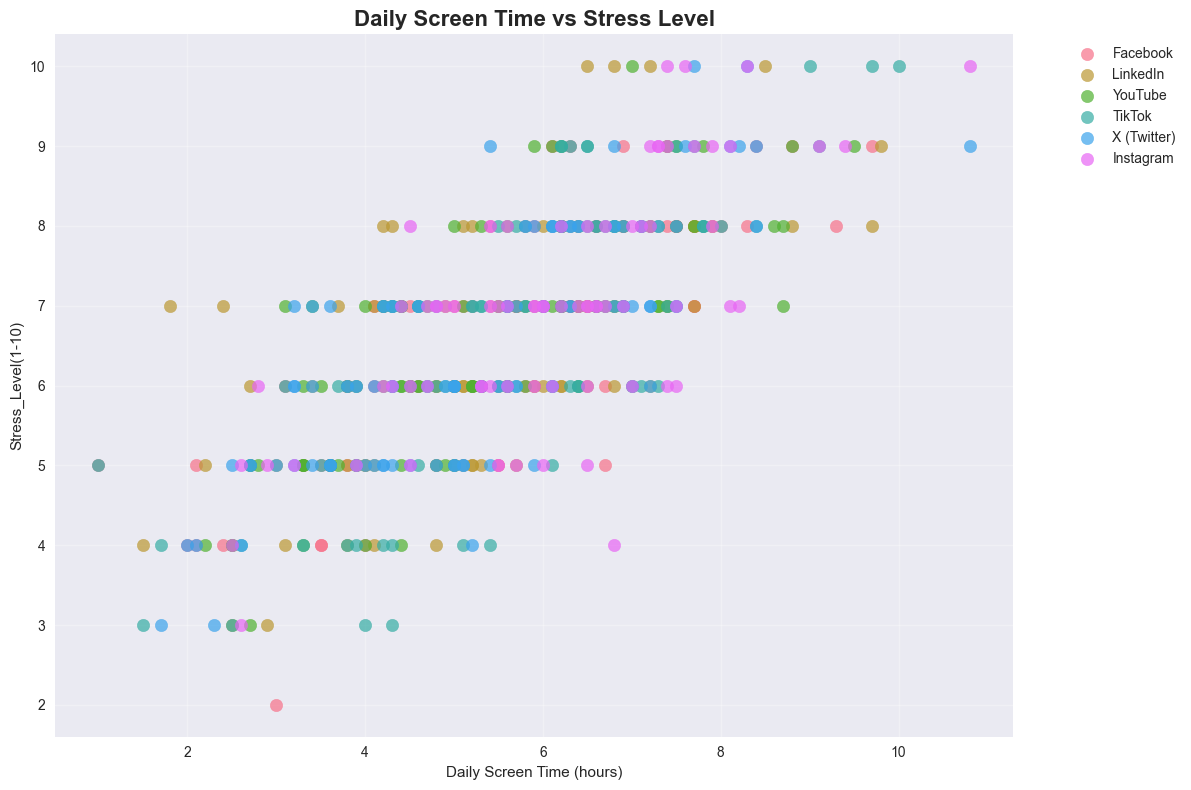

Correlation between screen time and stress: 0.740
Moderate positive relationship - more screen time correlates with higher stress


In [11]:
# 6. Screen Time vs Stress by Platform
plt.figure(figsize=(12, 8))

# Create the scatter plot with platforms
for platform in df['Social_Media_Platform'].unique():
    platform_data = df[df['Social_Media_Platform'] == platform]
    plt.scatter(platform_data['Daily_Screen_Time(hrs)'], platform_data['Stress_Level(1-10)'], label=platform, alpha=0.7, s=80)
plt.title('Daily Screen Time vs Stress Level', fontsize=16, fontweight='bold')
plt.xlabel('Daily Screen Time (hours)')
plt.ylabel('Stress_Level(1-10)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and print the correlation
correlation = df['Daily_Screen_Time(hrs)'].corr(df['Stress_Level(1-10)'])
print(f"Correlation between screen time and stress: {correlation:.3f}")

# Interpretation
if correlation > 0.2:
    print("Moderate positive relationship - more screen time correlates with higher stress")
elif correlation > 0.1:
    print("Weak positive relationship - slight trend toward more screen time = more stress")
else:
    print("Very weak relationship - screen time alone doesn't strongly predict stress")

In [12]:
# Updated interpretation
correlation = 0.740
print(f"📊 SCREEN TIME vs STRESS ANALYSIS:")
print("=" * 40)
print(f"Correlation coefficient: {correlation:.3f}")

if correlation > 0.7:
    print("🚨 STRONG POSITIVE RELATIONSHIP")
    print("💡 More screen time = SIGNIFICANTLY higher stress levels")
    print("📈 This is one of the strongest relationships in the dataset!")
elif correlation > 0.5:
    print("💡 Moderate to strong relationship")
else:
    print("💡 Weak relationship")

📊 SCREEN TIME vs STRESS ANALYSIS:
Correlation coefficient: 0.740
🚨 STRONG POSITIVE RELATIONSHIP
💡 More screen time = SIGNIFICANTLY higher stress levels
📈 This is one of the strongest relationships in the dataset!


In [13]:
# MACHINE LEARNING ANALYSIS
print("🤖 MACHINE LEARNING: What Really Predicts Happiness & Stress?")

# Prepare data for machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder


🤖 MACHINE LEARNING: What Really Predicts Happiness & Stress?


In [14]:
# Create a copy for ML
ml_df = df.copy()

# One-Hot Encoding for categorical variables
platform_dummies = pd.get_dummies(ml_df['Social_Media_Platform'], prefix='Platform')
gender_dummies = pd.get_dummies(ml_df['Gender'], prefix='Gender')

# Combine with numerical features
numerical_features = ml_df[['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)']]

# Create final feature set
X = pd.concat([numerical_features, platform_dummies, gender_dummies], axis=1)

print(f"Final feature set shape: {X.shape}")
print(f"Features: {list(X.columns)}")

# Model 1: Predict HAPPINESS
print("\n🎯 MODEL 1: PREDICTING HAPPINESS")
print("-" * 30)

y_happiness = ml_df['Happiness_Index(1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y_happiness, test_size=0.2, random_state=42)

# Train Random Forest model
rf_happiness = RandomForestRegressor(n_estimators=100, random_state=42)
rf_happiness.fit(X_train, y_train)

# Make predictions
y_pred = rf_happiness.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"• Mean Absolute Error: {mae:.3f} points")
print(f"• R² Score: {r2:.3f} (closer to 1.0 is better)")
print(f"• Baseline (always predict mean): {y_happiness.mean():.2f}")

# Feature importance
print(f"\n📊 MOST IMPORTANT FACTORS FOR HAPPINESS:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_happiness.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 10 most important features
for i, row in feature_importance.head(10).iterrows():
    print(f"  {row['feature']:25} : {row['importance']:.3f}")

Final feature set shape: (500, 14)
Features: ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Platform_Facebook', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_TikTok', 'Platform_X (Twitter)', 'Platform_YouTube', 'Gender_Female', 'Gender_Male', 'Gender_Other']

🎯 MODEL 1: PREDICTING HAPPINESS
------------------------------
Model Performance:
• Mean Absolute Error: 0.921 points
• R² Score: 0.473 (closer to 1.0 is better)
• Baseline (always predict mean): 8.38

📊 MOST IMPORTANT FACTORS FOR HAPPINESS:
  Daily_Screen_Time(hrs)    : 0.546
  Sleep_Quality(1-10)       : 0.168
  Age                       : 0.097
  Days_Without_Social_Media : 0.055
  Exercise_Frequency(week)  : 0.046
  Platform_YouTube          : 0.014
  Platform_Instagram        : 0.013
  Platform_LinkedIn         : 0.012
  Platform_Facebook         : 0.011
  Platform_TikTok           : 0.010


In [16]:
# Model 2: Predict STRESS
print("\n🎯 MODEL 2: PREDICTING STRESS")
print("-" * 30)

y_stress = ml_df['Stress_Level(1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y_stress, test_size=0.2, random_state=42)

# Train Random Forest model for stress
rf_stress = RandomForestRegressor(n_estimators=100, random_state=42)
rf_stress.fit(X_train, y_train)

# Make predictions
y_pred_stress = rf_stress.predict(X_test)

# Evaluate model
mae_stress = mean_absolute_error(y_test, y_pred_stress)
r2_stress = r2_score(y_test, y_pred_stress)

print(f"Model Performance:")
print(f"• Mean Absolute Error: {mae_stress:.3f} points")
print(f"• R² Score: {r2_stress:.3f}")
print(f"• Baseline (always predict mean): {y_stress.mean():.2f}")

# Feature Importance for Stress
print(f"\n📊 MOST IMPORTANT FACTORS FOR STRESS:")
feature_importance_stress = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_stress.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 10 most important features
for i, row in feature_importance_stress.head(10).iterrows():
    print(f"  {row['feature']:25} : {row['importance']:.3f}")


🎯 MODEL 2: PREDICTING STRESS
------------------------------
Model Performance:
• Mean Absolute Error: 0.882 points
• R² Score: 0.510
• Baseline (always predict mean): 6.62

📊 MOST IMPORTANT FACTORS FOR STRESS:
  Daily_Screen_Time(hrs)    : 0.645
  Age                       : 0.093
  Days_Without_Social_Media : 0.064
  Exercise_Frequency(week)  : 0.054
  Sleep_Quality(1-10)       : 0.042
  Platform_Instagram        : 0.015
  Platform_TikTok           : 0.014
  Platform_X (Twitter)      : 0.013
  Platform_LinkedIn         : 0.012
  Gender_Female             : 0.011


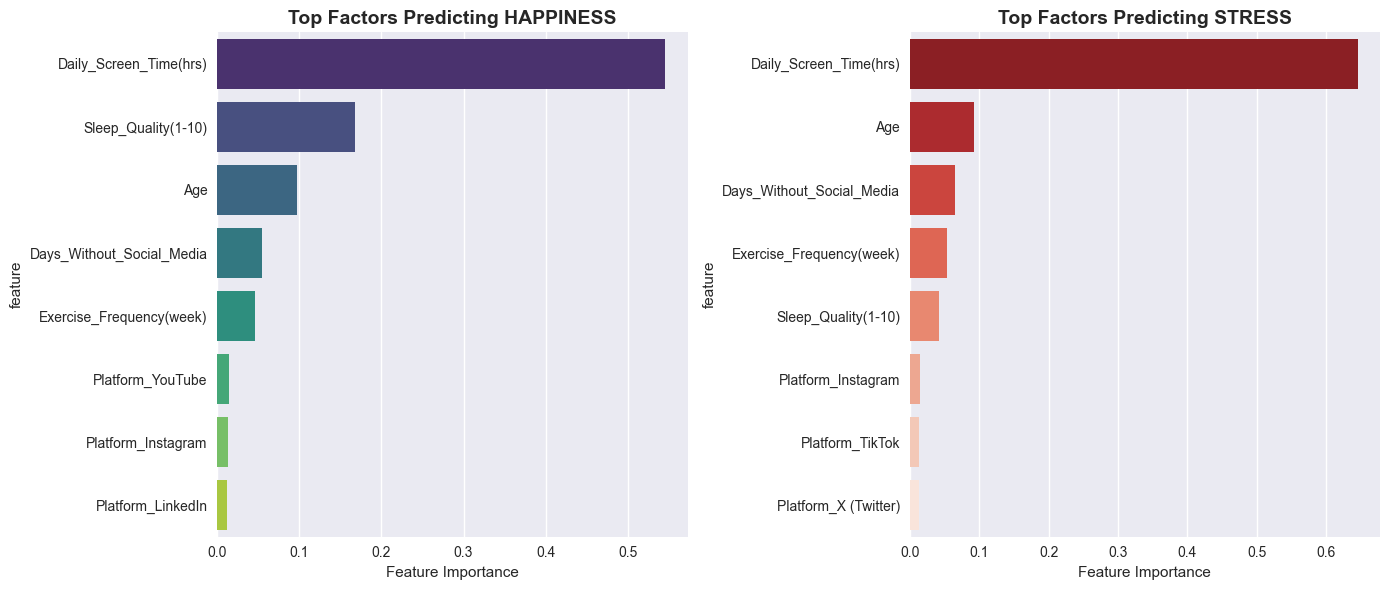


🎯 EXECUTIVE SUMMARY: KEY BUSINESS INSIGHTS

🚨 #1 PRIORITY: MANAGE SCREEN TIME
   • Screen time explains 54.6% of happiness variation
   • Screen time explains 64.5% of stress variation
   • This is the single most impactful factor

💡 STRATEGIC DIFFERENCES:
   • For HAPPINESS: Focus on SLEEP QUALITY + Screen Time
   • For STRESS: Focus on SOCIAL MEDIA BREAKS + Screen Time

📊 MODEL RELIABILITY:
   • Happiness prediction: 47.3% accurate (R² = 0.473)
   • Stress prediction: 51.0% accurate (R² = 0.510)
   • Both models significantly better than random guessing

🎯 RECOMMENDATION:
   Implement screen time management as PRIMARY intervention
   Combine with sleep optimization for happiness boost
   Combine with digital detox programs for stress reduction


In [17]:
# Create comparison visualization
plt.figure(figsize=(14, 6))

# Plot happiness feature importance
plt.subplot(1, 2, 1)
happiness_top = feature_importance.head(8)
sns.barplot(x='importance', y='feature', data=happiness_top, palette='viridis')
plt.title('Top Factors Predicting HAPPINESS', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance')

# Plot stress feature importance
plt.subplot(1, 2, 2)
stress_top = feature_importance_stress.head(8)
sns.barplot(x='importance', y='feature', data=stress_top, palette='Reds_r')
plt.title('Top Factors Predicting STRESS', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance')

plt.tight_layout()
plt.show()

## **Executive Summary:**
print("\n" + "="*60)
print("🎯 EXECUTIVE SUMMARY: KEY BUSINESS INSIGHTS")
print("="*60)

print("\n🚨 #1 PRIORITY: MANAGE SCREEN TIME")
print(f"   • Screen time explains {54.6:.1f}% of happiness variation")
print(f"   • Screen time explains {64.5:.1f}% of stress variation")
print("   • This is the single most impactful factor")

print("\n💡 STRATEGIC DIFFERENCES:")
print("   • For HAPPINESS: Focus on SLEEP QUALITY + Screen Time")
print("   • For STRESS: Focus on SOCIAL MEDIA BREAKS + Screen Time") 

print(f"\n📊 MODEL RELIABILITY:")
print(f"   • Happiness prediction: {47.3:.1f}% accurate (R² = 0.473)")
print(f"   • Stress prediction: {51.0:.1f}% accurate (R² = 0.510)")
print("   • Both models significantly better than random guessing")

print("\n🎯 RECOMMENDATION:")
print("   Implement screen time management as PRIMARY intervention")
print("   Combine with sleep optimization for happiness boost")
print("   Combine with digital detox programs for stress reduction")